# PMP Taylor Diagram: Mean Climate, comparing CMIP5 & CMIP6 models

Visualize PMP's Mean climate metrics output using Taylor Diagram. This notebook generates a static image of Taylor Diagram for mean climate metrics obtained from CMIP5 and CMIP6 models, and compare multi-model averaged statistics from each group.

Written by Jiwoo Lee (LLNL/PCMDI)

Last update: May 2022

## 1. Read data from JSON files

Input data for portrait plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Download PMP output JSON files for CMIP models <a name="download"></a>

In [1]:
import glob
import os
import numpy as np
import requests
import pandas as pd
from pcmdi_metrics.graphics import download_archived_results

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive). 

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

In [3]:
json_dir = './json_files'

In [4]:
mip = "cmip5"
exp = "historical"
data_version = "v20200429"

In [5]:
for var in vars:
    path = "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    download_archived_results(path, json_dir)

Download completed: ./json_files/pr.cmip5.historical.regrid2.2p5x2p5.v20200429.json
metrics_results/mean_climate/cmip5/historical/v20200429/prw.cmip5.historical.regrid2.2p5x2p5.v20200429.json not exist in  https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/
Download completed: ./json_files/psl.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rltcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlus.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rlutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
Download completed: ./json_files/rsds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
metrics_results/mean_climate/cmip5/historical/v20200429/rsdscs.cmip5.historical.regrid2.2p5x2p5.v20200429.json not exist in

In [6]:
mip = "cmip6"
exp = "historical"
data_version = "v20210811"

In [7]:
for var in vars:
    path = "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    download_archived_results(path, json_dir)

Download completed: ./json_files/pr.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/prw.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/psl.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rltcre.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlus.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlut.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rlutcs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsds.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdscs.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rsdt.cmip6.historical.regrid2.2p5x2p5.v20210811.json
Download completed: ./json_files/rstcre.cmip6.histor

Check JSON files

In [8]:
json_list_1 = sorted(glob.glob(os.path.join(json_dir, '*.cmip5.' + exp + '*' + '.json')))
json_list_2 = sorted(glob.glob(os.path.join(json_dir, '*.cmip6.' + exp + '*' + '.json')))

In [9]:
print('CMIP5 JSON files:')
for i, json_file in enumerate(json_list_1):
    print(i+1, json_file.split('/')[-1])
    
print('CMIP6 JSON files:')
for i, json_file in enumerate(json_list_2):
    print(i+1, json_file.split('/')[-1])

CMIP5 JSON files:
1 pr.cmip5.historical.regrid2.2p5x2p5.v20200429.json
2 psl.cmip5.historical.regrid2.2p5x2p5.v20200429.json
3 rlds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
4 rltcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
5 rlus.cmip5.historical.regrid2.2p5x2p5.v20200429.json
6 rlut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
7 rlutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
8 rsds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
9 rsdt.cmip5.historical.regrid2.2p5x2p5.v20200429.json
10 rstcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
11 rsut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
12 rsutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
13 sfcWind.cmip5.historical.regrid2.2p5x2p5.v20200429.json
14 ta-200.cmip5.historical.regrid2.2p5x2p5.v20200429.json
15 ta-850.cmip5.historical.regrid2.2p5x2p5.v20200429.json
16 tas.cmip5.historical.regrid2.2p5x2p5.v20200429.json
17 tauu.cmip5.historical.regrid2.2p5x2p5.v20200429.json
18 ua-200.cmip5.historical.r

### 1.2 Extract data from JSON files <a name="extract"></a>

Use `Metrics` class (that use `read_mean_clim_json_files` function underneath) to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files

#### Returned object includes
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `var_ref_dict`: dictonary for reference dataset used for each variable
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [10]:
from pcmdi_metrics.graphics import Metrics

In [11]:
library_cmip5 = Metrics(json_list_1, mip="cmip5")

In [12]:
library_cmip6 = Metrics(json_list_2, mip="cmip6")

### 1.3 Merge data

In [13]:
# merge dataframes
combined = library_cmip5.merge(library_cmip6)

In [14]:
var = "pr"
season = "jja"
region = "global"

### 1.4 Multi-model averaged statistics

#### 1.4.1 Standard deviation

In [15]:
stat1 = "std_xy"

# mean value of statistics from multi models in each CMIP
combined.df_dict[stat1][season][region].loc['CMIP5 mean'] = library_cmip5.df_dict[stat1][season][region].mean(numeric_only=True, skipna=True)
combined.df_dict[stat1][season][region].loc['CMIP6 mean'] = library_cmip6.df_dict[stat1][season][region].mean(numeric_only=True, skipna=True)

combined.df_dict[stat1][season][region].at['CMIP5 mean', 'model'] = 'CMIP5 mean'
combined.df_dict[stat1][season][region].at['CMIP6 mean', 'model'] = 'CMIP6 mean'

#### 1.4.2 Correlation

Correlation cannot be simply averaged. The average code below follows [this](https://quant.stackexchange.com/questions/66264/how-to-properly-calculate-the-average-across-multiple-correlations), which follows [this](https://www.researchgate.net/post/average_of_Pearson_correlation_coefficient_values).

In [16]:
def average_cor(corr):
    mean_z = np.nanmean(np.arctanh(corr).values)
    mean_corr = np.tanh(mean_z)
    return mean_corr

In [17]:
stat2 = "cor_xy"

corr_cmip5 = library_cmip5.df_dict[stat2][season][region][var]
corr_cmip6 = library_cmip6.df_dict[stat2][season][region][var]

# mean value of correlation from multi models in each CMIP
corr_ave_cmip5 = average_cor(corr_cmip5)
corr_ave_cmip6 = average_cor(corr_cmip6)

In [18]:
combined.df_dict[stat2][season][region].loc['CMIP5 mean', var] = corr_ave_cmip5
combined.df_dict[stat2][season][region].loc['CMIP6 mean', var] = corr_ave_cmip6

In [19]:
combined.df_dict[stat2][season][region].at['CMIP5 mean', 'model'] = 'CMIP5 mean'
combined.df_dict[stat2][season][region].at['CMIP6 mean', 'model'] = 'CMIP6 mean'

### 1.5 Reference dataset

In [20]:
var_ref_dict = combined.var_ref_dict

In [21]:
var_ref_dict

{'pr': 'GPCP-2-3',
 'psl': 'ERA-5',
 'rlds': 'CERES-EBAF-4-1',
 'rltcre': 'CERES-EBAF-4-1',
 'rlus': 'CERES-EBAF-4-1',
 'rlut': 'CERES-EBAF-4-1',
 'rlutcs': 'CERES-EBAF-4-1',
 'rsds': 'CERES-EBAF-4-1',
 'rsdt': 'CERES-EBAF-4-1',
 'rstcre': 'CERES-EBAF-4-1',
 'rsut': 'CERES-EBAF-4-1',
 'rsutcs': 'CERES-EBAF-4-1',
 'sfcWind': 'REMSS-PRW-v07r01',
 'ta-200': 'ERA-5',
 'ta-850': 'ERA-5',
 'tas': 'ERA-5',
 'tauu': 'ERA-INT',
 'ua-200': 'ERA-5',
 'ua-850': 'ERA-5',
 'va-200': 'ERA-5',
 'va-850': 'ERA-5',
 'zg-500': 'ERA-5',
 'prw': 'REMSS-PRW-v07r01',
 'rsdscs': 'CERES-EBAF-4-1',
 'ts': 'ERA-5'}

## 2. Plot

In [22]:
import matplotlib.pyplot as plt
from pcmdi_metrics.graphics import TaylorDiagram

Usage of `TaylorDiagram` function:

Parameters
----------
    stddev : numpy.ndarray
        an array of standard deviations
    corrcoeff : numpy.ndarray
        an array of correlation coefficients
    refstd : float
        the reference standard deviation
    fig : matplotlib figure
        the matplotlib figure
    colors : array
        an array of colors for each element of the input arrays
    normalize : bool, optional
        disable to skip normalization of the standard deviation
    labels : list, optional
        list of text for labels
    markers : list, optional
        list of marker type
    markersizes : list, optional
        list of integer for marker size
    zorders : list, optional
        list of integer for zorder
    ref_label : str, optional
        label for reference data
    smax : int or float, optional
        maximum of axis range for (normalized) standard deviation

Return
------
    fig : matplotlib figure
        the matplotlib figure
    ax : matplotlib axis
        the matplotlib axis

In [23]:
stddev = combined.df_dict["std_xy"][season][region][var].to_numpy()
refstd = combined.df_dict['std-obs_xy'][season][region][var][0]
corrcoeff = combined.df_dict["cor_xy"][season][region][var].to_numpy()
models = combined.df_dict["cor_xy"][season][region]['model'].to_list()

In [24]:
stddev

array([3.04900000e+00, 2.59500000e+00, 2.57600000e+00, 2.53600000e+00,
       2.62800000e+00, 2.68100000e+00, 2.42200000e+00, 3.37500000e+00,
       2.69900000e+00, 2.51100000e+00, 2.47000000e+00, 2.71800000e+00,
       2.60500000e+00, 2.81100000e+00, 2.60400000e+00, 2.86600000e+00,
       3.05200000e+00, 2.62900000e+00, 2.70100000e+00, 2.59300000e+00,
       2.65200000e+00, 2.60400000e+00, 2.82500000e+00, 3.01300000e+00,
       3.02600000e+00, 3.06200000e+00, 3.03800000e+00, 2.80400000e+00,
       2.56100000e+00, 2.87200000e+00, 2.94100000e+00, 2.93600000e+00,
       2.86800000e+00, 2.77600000e+00, 2.60700000e+00, 2.76800000e+00,
       2.93100000e+00, 2.71800000e+00, 2.89600000e+00, 2.71800000e+00,
       3.00000000e-03, 2.73000000e+00, 2.90000000e+00, 2.97400000e+00,
       2.64900000e+00, 2.60200000e+00, 2.56200000e+00, 2.61900000e+00,
       2.58000000e+00, 2.61700000e+00, 2.53800000e+00, 2.69400000e+00,
       2.86700000e+00, 2.91700000e+00, 2.83200000e+00, 2.79400000e+00,
      

In [25]:
corrcoeff

array([0.84      , 0.79      , 0.7       , 0.81      , 0.85      ,
       0.85      , 0.84      , 0.73      , 0.83      , 0.75      ,
       0.78      , 0.78      , 0.81      , 0.79      , 0.8       ,
       0.78      , 0.86      , 0.77      , 0.76      , 0.75      ,
       0.75      , 0.76      , 0.82      , 0.85      , 0.78      ,
       0.79      , 0.77      , 0.79      , 0.79      , 0.8       ,
       0.85      , 0.81      , 0.75      , 0.83      , 0.82      ,
       0.74      , 0.89      , 0.85      , 0.89      , 0.83      ,
       0.88      , 0.84      , 0.86      , 0.82      , 0.83      ,
       0.83      , 0.83      , 0.87      , 0.86      , 0.87      ,
       0.87      , 0.79      , 0.73      , 0.87      , 0.89      ,
       0.86      , 0.77      , 0.77      , 0.75      , 0.78      ,
       0.79      , 0.83      , 0.82      , 0.74      , 0.87      ,
       0.74      , 0.85      , 0.8       , 0.84      , 0.81      ,
       0.75      , 0.91      , 0.85      , 0.87      , 0.79534

### 2.1 Plot example 1: label all models

Text(0.5, 0.4, 'Example')

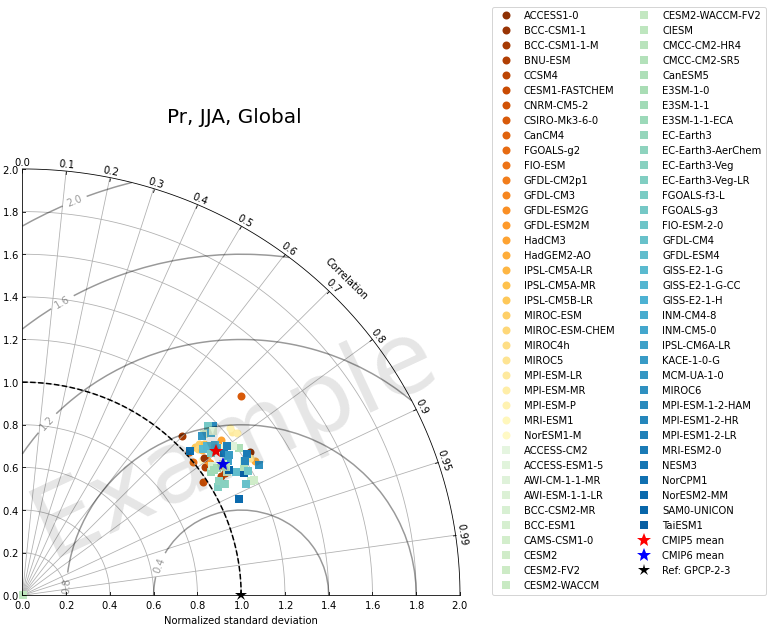

In [26]:
fig = plt.figure(figsize=(8,8))

models1 = library_cmip5.df_dict["cor_xy"][season][region]['model'].to_list()
models2 = library_cmip6.df_dict["cor_xy"][season][region]['model'].to_list()

colors1 = plt.matplotlib.cm.YlOrBr_r(np.linspace(0.1, 0.9, len(models1)))
colors2 = plt.matplotlib.cm.GnBu(np.linspace(0.1, 0.9, len(models2)))
colors3 = plt.matplotlib.cm.bwr_r(np.linspace(0, 1, 2))  # For CMIP5 mean and CMIP6 mean

markers1 = ['o'] * len(models1)
markers2 = ['s'] * len(models2)
markers3 = ['*', '*']  # For CMIP5 mean and CMIP6 mean

markersizes1 = [8] * len(models1)
markersizes2 = [8] * len(models2)
markersizes3 = [15] * 2

zorders1 = [1] * len(models1)
zorders2 = [2] * len(models2)
zorders3 = [100, 101]

# combine them and build a new colormap
colors = np.vstack((colors1, colors2, colors3))
markers = markers1 + markers2 + markers3
zorders = zorders1 + zorders2 + zorders3
markersizes = markersizes1 + markersizes2 + markersizes3

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, fig, colors, normalize=True, 
                        labels=models, ref_label='Ref: '+var_ref_dict[var],
                        markers=markers, zorders=zorders, markersizes=markersizes
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=2)
fig.suptitle(', '.join([var.title(), season.upper(), region.title()]), fontsize=20)

# Add Watermark
fig.text(0.5, 0.4, 'Example',
        fontsize=100, color='black', alpha=0.1,
        ha='center', va='center', rotation='25')

### 2.2 Plot example 2: label only model group

Text(0.5, 0.4, 'Example')

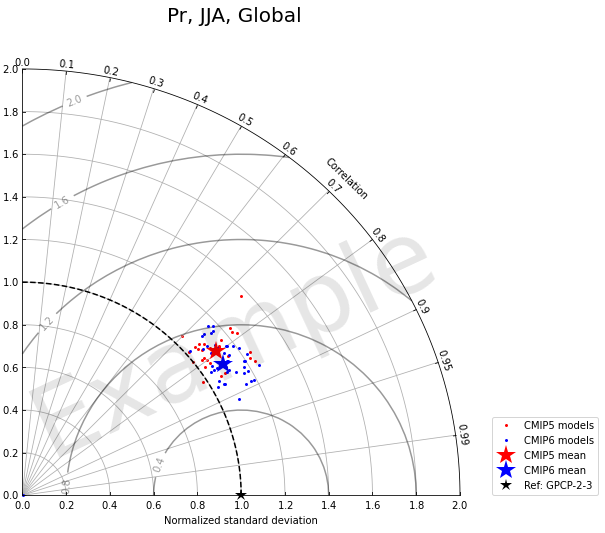

In [27]:
fig = plt.figure(figsize=(8,8))

models1 = library_cmip5.df_dict["cor_xy"][season][region]['model'].to_list()
models2 = library_cmip6.df_dict["cor_xy"][season][region]['model'].to_list()

colors1 = ['red'] * len(models1)
colors2 = ['blue'] * len(models2)
colors3 = ['red', 'blue']  # For CMIP5 mean and CMIP6 mean

markers1 = ['o'] * len(models1)
markers2 = ['o'] * len(models2)
markers3 = ['*', '*']  # For CMIP5 mean and CMIP6 mean

markersizes1 = [3] * len(models1)
markersizes2 = [3] * len(models2)
markersizes3 = [20] * 2

zorders1 = [1] * len(models1)
zorders2 = [2] * len(models2)
zorders3 = [100, 101]

labels1 = ['CMIP5 models'] + [None] * (len(models1) - 1)
labels2 = ['CMIP6 models'] + [None] * (len(models2) - 1)
labels3 = ['CMIP5 mean', 'CMIP6 mean']

# combine them and build a new colormap
colors = colors1 + colors2 + colors3
markers = markers1 + markers2 + markers3
zorders = zorders1 + zorders2 + zorders3
labels = labels1 + labels2 + labels3
markersizes = markersizes1 + markersizes2 + markersizes3

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, fig, colors, normalize=True, 
                        labels=labels, ref_label='Ref: '+var_ref_dict[var],
                        markers=markers, zorders=zorders, markersizes=markersizes
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=1)
fig.suptitle(', '.join([var.title(), season.upper(), region.title()]), fontsize=20)

# Add Watermark
fig.text(0.5, 0.4, 'Example',
        fontsize=100, color='black', alpha=0.1,
        ha='center', va='center', rotation='25')